# House prices


## Imports

In [1]:
from matplotlib.pyplot import scatter
from sklearn.linear_model import LogisticRegression
from unicodedata import category
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets
from ydata_profiling import ProfileReport
import seaborn as sns
import xgboost as xgb
from category_encoders import TargetEncoder, OrdinalEncoder
from sklearn import datasets, linear_model, metrics, model_selection, svm
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.feature_selection import mutual_info_regression
from catboost import CatBoostClassifier, CatBoostRegressor
from ydata_profiling.model.dataframe import preprocess

## Data overview

### Data load

In [2]:
df = pd.read_csv('/kaggle/input/inputd/train.csv')
df_test = pd.read_csv('/kaggle/input/inputd/test.csv')
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Data first check

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

### Target dist

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


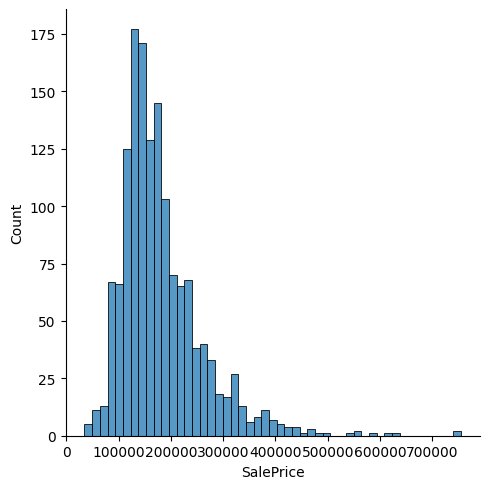

In [6]:

sns.displot(df['SalePrice'])

### Features

#### F Creating

#### Mutual Information

In [7]:


df_mi = df.copy()
df_mi.drop(['SalePrice'], axis=1, inplace=True)
y_mi = df['SalePrice']


num_columns = df_mi.select_dtypes(include=['float64', 'int'], exclude=['object', 'category'])




df_mi[num_columns.columns] = df_mi[num_columns.columns].fillna(df_mi[num_columns.columns].mode().iloc[0])

for x in df_mi.select_dtypes(include=["object", "category"]):
    df_mi[x], _ = df_mi[x].factorize()

discrete_features = [pd.api.types.is_integer_dtype(t) for t in df_mi.dtypes]
discrete_features = df_mi.nunique() <= 50
mi_scores = mutual_info_regression(df_mi, y_mi, discrete_features=discrete_features, random_state=0)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=df_mi.columns)
mi_scores = mi_scores.sort_values(ascending=False)
print(mi_scores[:15])

OverallQual     0.570827
Neighborhood    0.527982
GrLivArea       0.483068
YearBuilt       0.373383
TotalBsmtSF     0.367589
GarageCars      0.361162
GarageArea      0.358783
ExterQual       0.335391
KitchenQual     0.332518
BsmtQual        0.327871
1stFlrSF        0.308747
MSSubClass      0.283310
GarageFinish    0.272875
FullBath        0.258635
YearRemodAdd    0.254873
Name: MI Scores, dtype: float64


#### MI features

In [8]:
mi_features = ['Neighborhood', 'KitchenQual', 'ExterQual', 'BsmtQual', 'OverallQual','GrLivArea', 'YearBuilt', 'TotalBsmtSF', 'GarageArea', '1stFlrSF', 'MSSubClass']
num_features = mi_features[4:]
order_features = mi_features[1:4]
cat_features = mi_features[0:1]

print(order_features)
print(num_features)
print(cat_features)

['KitchenQual', 'ExterQual', 'BsmtQual']
['OverallQual', 'GrLivArea', 'YearBuilt', 'TotalBsmtSF', 'GarageArea', '1stFlrSF', 'MSSubClass']
['Neighborhood']


#### Num features

array([[<Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': 'GarageArea'}>,
        <Axes: title={'center': '1stFlrSF'}>],
       [<Axes: title={'center': 'MSSubClass'}>, <Axes: >, <Axes: >]],
      dtype=object)

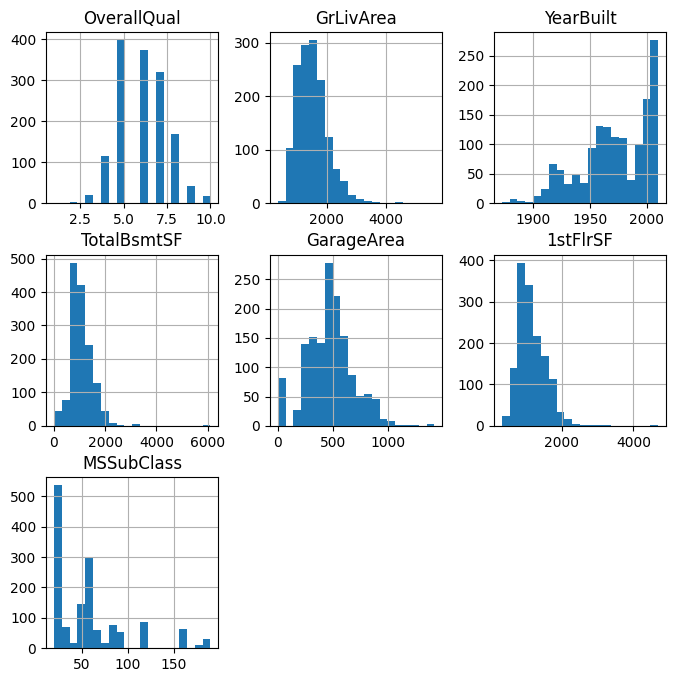

In [9]:
df[num_features].hist(figsize = (8,8), bins = 20)

In [10]:
df['MSSubClass'].describe()

count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64

#### Cat features

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

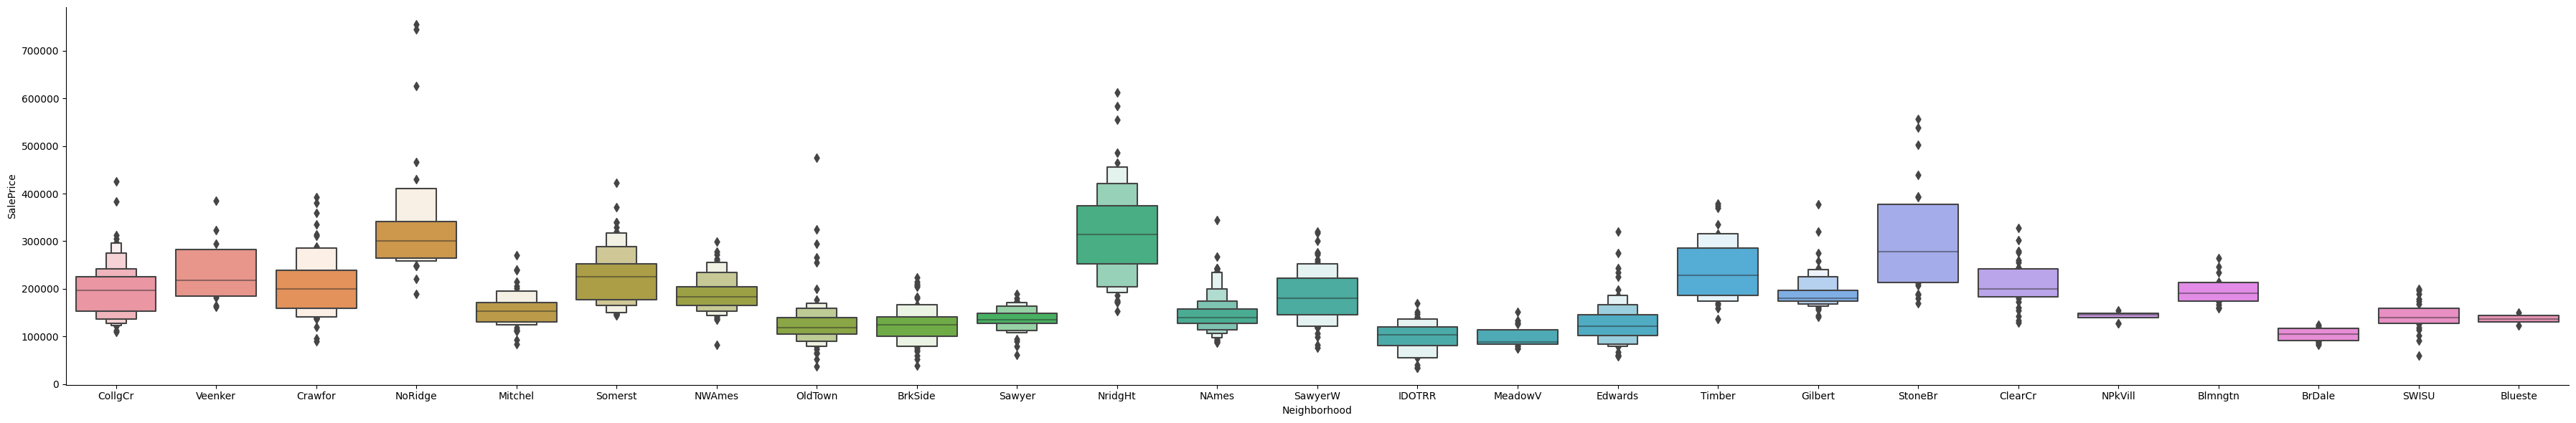

In [11]:
sns.catplot(data=df, x='Neighborhood', y='SalePrice', kind='boxen', height=6, aspect=6)

#### Order features

In [12]:
#sns.catplot(data=df, x='Neighborhood', y='SalePrice', kind='boxen', height=6, aspect=6)

#### Corr

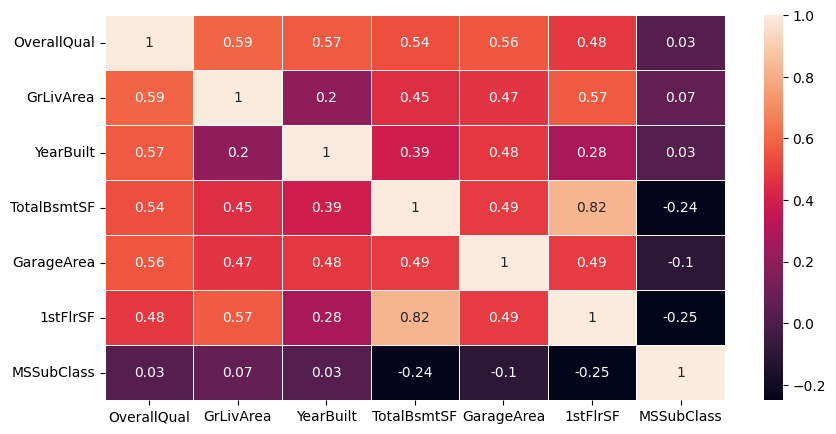

In [13]:
plt.figure(figsize=(10, 5))
matrix = sns.heatmap(np.round(df[num_features].corr(), 2), annot=True, linewidths=.5)

## FE

## Model Building

### LinearRegression

#### X

In [14]:
X_train, y_train = df[mi_features], df['SalePrice']
y_train = np.log(y_train)
X_train.head()
X_test = df_test[mi_features]


#### Pipelines

In [15]:
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())])


In [16]:
from category_encoders import CatBoostEncoder

cat_pipeline = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')), ('encoder', CatBoostEncoder())])

In [17]:
neigh_unique = df['Neighborhood'].unique()
neigh_order = ['NridgHt', 'NoRidge',  'StoneBr', 'Timber', 'Somerst', 'Gilbert', 'ClearCr']
for place in neigh_unique:
    if not (place in neigh_order):
        neigh_order.append(place)


print(neigh_order)

['NridgHt', 'NoRidge', 'StoneBr', 'Timber', 'Somerst', 'Gilbert', 'ClearCr', 'CollgCr', 'Veenker', 'Crawfor', 'Mitchel', 'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NAmes', 'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU', 'Blueste']
['NridgHt', 'NoRidge', 'StoneBr', 'Timber', 'Somerst', 'Gilbert', 'ClearCr', 'CollgCr', 'Veenker', 'Crawfor', 'Mitchel', 'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NAmes', 'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU', 'Blueste']


In [18]:
ordered_categories = [
    ['Fa', 'TA', 'Gd', 'Ex'] ,['Fa', 'TA', 'Gd', 'Ex'], ['Fa', 'TA', 'Gd', 'Ex']
]
order_pipeline = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')), ('encoder', OrdinalEncoder(categories= ordered_categories))])

#### F E

In [19]:
def add_place(X):
    X = X.copy()
    X['CarPlace'] = df['GarageArea'] / 1
    return X


feature_adder = FunctionTransformer(add_place, validate=False, feature_names_out='passthrough')


#### Preprocessor

In [20]:
preprocessor = ColumnTransformer([('num', num_pipeline, num_features), ('cat', cat_pipeline, cat_features), ('order', order_pipeline, order_features)])


#### LR pipeline

In [21]:

pipeline = Pipeline([('preprocessor', preprocessor), ('classifier', linear_model.LinearRegression())])
print(y_train.shape)

(1460,)


In [22]:
pipeline.fit(X_train, y_train)
scoring = {
    'RMSE': 'neg_root_mean_squared_error',
    'R2': 'r2'
}
scores = cross_validate(pipeline, X_train, y_train, scoring=scoring, cv=5, return_train_score=False)


print({scores['test_RMSE'].mean()})
print({scores['test_R2'].mean()})
#(-35040.71405432987)}
#{np.float64(0.8014720198546132)}
#{np.float64(-34434.99353300908)}
#{np.float64(0.8084104514276819)}

{-0.1625451159359403}
{0.830796424095927}


## Submission

In [23]:
df_submission = pd.read_csv('/kaggle/input/inputd/sample_submission.csv', index_col=False)
df_submission['SalePrice'] = np.exp(pipeline.predict(X_test))
df_submission.columns = ['Id', 'SalePrice']
df_submission.to_csv('submission.csv', index=False)